In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.src.models import Sequential
from keras.src.layers import Dense
from keras.src.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [29]:
data = pd.read_csv("./Data/File_Acc_Tel_v1.csv")

In [30]:
# Separazione delle feature e della label
X = data[['AccX', 'AccY', 'AccZ']].values  # Feature: valori di accelerazione
y = data['is_moving'].values                   # Target: etichette

In [31]:
# Divisione del dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)

In [32]:
# Standardizzazione dei dati
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Conversione delle etichette in formato categorico
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [33]:
# Creazione del modello Sequential
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),   # Primo strato con 64 unità e funzione di attivazione ReLU
    Dense(32, activation='relu'),                     # Secondo strato nascosto con 32 unità
    Dense(y_train_cat.shape[1], activation='softmax') # Strato output con attivazione softmax (classificazione)
])

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compilazione del modello
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6845 - loss: 0.5782 - val_accuracy: 0.7001 - val_loss: 0.4446
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7268 - loss: 0.4138 - val_accuracy: 0.8539 - val_loss: 0.3875
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8628 - loss: 0.3497 - val_accuracy: 0.8539 - val_loss: 0.3566
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8545 - loss: 0.3131 - val_accuracy: 0.8551 - val_loss: 0.3402
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8589 - loss: 0.3072 - val_accuracy: 0.8501 - val_loss: 0.3308
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8660 - loss: 0.2871 - val_accuracy: 0.8501 - val_loss: 0.3237
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8716 - loss: 0.2894 - val_accuracy: 0.8526 - val_loss: 0.3211
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8839 - loss: 0.2635 - val_accuracy: 0.8513 - v

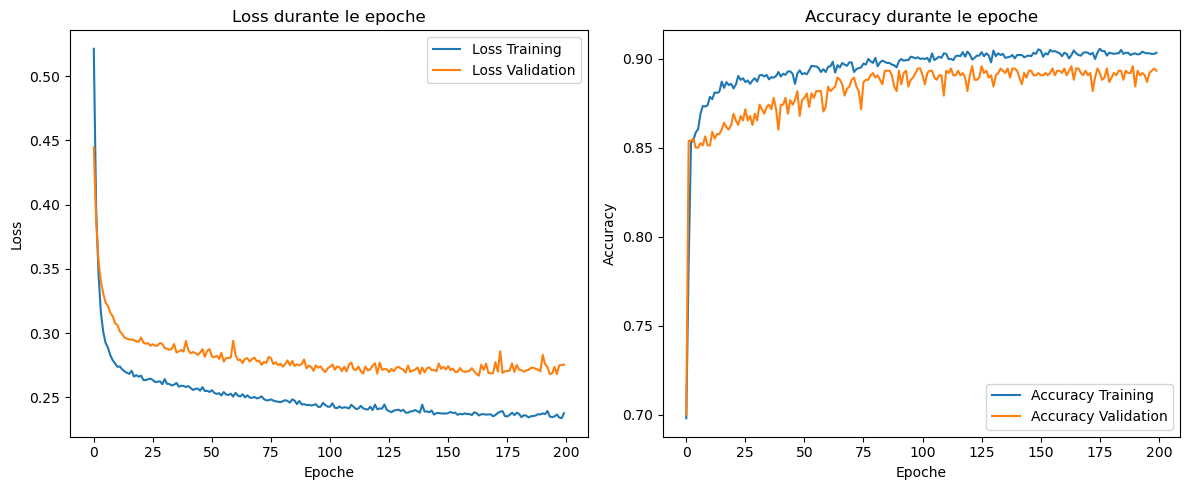

In [35]:
history = model.fit(X_train, y_train_cat, epochs=200, batch_size=64, validation_split=0.2)

# Grafico della loss durante le epoche
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validation')
plt.title('Loss durante le epoche')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.legend()

# Grafico dell'accuracy durante le epoche
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy Training')
plt.plot(history.history['val_accuracy'], label='Accuracy Validation')
plt.title('Accuracy durante le epoche')
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
# Valutazione del modello
y_pred_cat = model.predict(X_test)
y_pred = y_pred_cat.argmax(axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [37]:
# Accuratezza e report di classificazione
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuratezza del modello:", accuracy)
print("\nReport di classificazione:\n", report)


Accuratezza del modello: 0.9136178861788617

Report di classificazione:
               precision    recall  f1-score   support

       False       0.80      0.92      0.85       271
        True       0.97      0.91      0.94       713

    accuracy                           0.91       984
   macro avg       0.88      0.92      0.90       984
weighted avg       0.92      0.91      0.92       984



In [38]:
y_test_pred = np.argmax(model.predict(X_test), axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [39]:
giuste, sbagliate = 0, 0
for y_pred, y in zip(y_test_pred, y_test):
    if y_pred == y:
        giuste += 1
    else:
        sbagliate +=1

print(f"Giuste= {giuste}     Sbagliate= {sbagliate}")

Giuste= 899     Sbagliate= 85


In [40]:
model.save("./MyModels/ModelTelv1.keras", overwrite=False)